In [1]:
import pandas as pd
import seaborn as sns
import os
import numpy as np

In [2]:
#df = pd.read_csv('data/involved_hebrew.csv.gz')
#df.to_parquet('data/involved_hebrew.parquet')
df = pd.read_parquet('data/involved_hebrew.parquet')
heb_cols = [c for c in df.columns if c.endswith('hebrew') or c.endswith('_name')]
heb = df[heb_cols]
d = df[[c for c in df.columns if not c in heb_cols]]

In [3]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
accident_id,1623850.0,2.012525e+09,3.099840e+06,2.008000e+09,2.010016e+09,2.012052e+09,2.015067e+09,2.018100e+09
provider_and_id,1623850.0,2.706703e+10,8.628568e+09,1.200800e+10,3.200800e+10,3.201100e+10,3.201407e+10,3.201810e+10
provider_code,1623850.0,2.505451e+00,8.628558e-01,1.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00
involved_type,1623850.0,1.871672e+00,7.776755e-01,1.000000e+00,1.000000e+00,2.000000e+00,2.000000e+00,3.000000e+00
license_acquiring_date,1623850.0,1.101976e+03,9.924270e+02,0.000000e+00,0.000000e+00,1.977000e+03,1.999000e+03,4.444000e+03
age_group,1623850.0,2.735682e+01,3.737263e+01,1.000000e+00,6.000000e+00,9.000000e+00,1.400000e+01,9.900000e+01
sex,1282339.0,1.382590e+00,4.860196e-01,1.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00,2.000000e+00
vehicle_type,1534715.0,3.936181e+00,5.251943e+00,1.000000e+00,1.000000e+00,1.000000e+00,4.000000e+00,1.900000e+01
safety_measures,1623809.0,4.188140e+00,1.577983e+00,1.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00
involve_yishuv_symbol,1267489.0,4.391544e+03,3.103240e+03,7.000000e+00,1.139000e+03,4.000000e+03,7.300000e+03,9.800000e+03


In [4]:
df.dtypes

accident_id                     int64
provider_and_id                 int64
provider_code                   int64
involved_type                   int64
involved_type_hebrew           object
license_acquiring_date          int64
age_group                       int64
age_group_hebrew               object
sex                           float64
sex_hebrew                     object
vehicle_type                  float64
vehicle_type_hebrew            object
safety_measures               float64
safety_measures_hebrew         object
involve_yishuv_symbol         float64
involve_yishuv_name            object
injury_severity               float64
injury_severity_hebrew         object
injured_type                  float64
injured_type_hebrew            object
injured_position              float64
injured_position_hebrew        object
population_type               float64
population_type_hebrew         object
home_region                   float64
region_hebrew                  object
home_distric

In [5]:
def color_pos_red(val, cutoff=0.85):
    return 'color: %s' % ('red' if val >=cutoff  else 'grey')
if not 'dcor' in globals():
    dcor = d.corr()
dcor.style.applymap(color_pos_red)

,accident_id,provider_and_id,provider_code,involved_type,license_acquiring_date,age_group,sex,vehicle_type,safety_measures,involve_yishuv_symbol,injury_severity,injured_type,injured_position,population_type,home_region,home_district,home_natural_area,home_municipal_status,home_residence_type,hospital_time,medical_type,release_dest,safety_measures_use,late_deceased,car_id,involve_id,accident_year,accident_month
accident_id,1,0.00347754,0.00311829,-0.0215229,0.00153441,0.00332289,0.00827304,0.000804532,0.168225,-0.0219055,-0.0177893,0.0246889,0.0887815,0.0368011,-0.00875725,0.0103058,-0.00626224,0.0105388,0.0404981,-0.00382594,0.0571502,-0.00221621,-0.103857,0.0204735,0.0172061,-0.00380741,0.999966,-0.0578433
provider_and_id,0.00347754,1,1,-0.118558,-0.102653,0.243835,0.0374567,0.0399819,0.196018,0.019781,0.234833,0.0136096,0.0792654,-0.0938095,0.00397995,0.197847,0.0040284,0.0201232,-0.0345712,-0.25327,-0.256531,-0.212813,0.000925762,0.0204735,-0.0659733,-0.160872,0.0035425,0.00300967
provider_code,0.00311829,1,1,-0.118551,-0.102653,0.243834,0.037454,0.0399817,0.195957,0.0197885,0.234839,0.0136011,0.0792336,-0.0938228,0.00398294,0.197844,0.00403054,0.0201197,-0.0345851,-0.253267,-0.256547,-0.21281,0.000958849,nan,-0.0659798,-0.160871,0.00318326,0.00303045
involved_type,-0.0215229,-0.118558,-0.118551,1,-0.216126,-0.529164,0.255023,-0.0832714,-0.205442,-0.0334944,-0.038876,0.0504748,-0.321225,0.213081,-0.078104,-0.464342,-0.0742543,0.0900469,0.0712561,0.0251786,0.0183968,0.0701461,-0.0882119,0.0511849,-0.0481577,0.0936103,-0.0216602,-0.00148787
license_acquiring_date,0.00153441,-0.102653,-0.102653,-0.216126,1,-0.537088,-0.202073,-0.180538,-0.208307,0.0278543,0.0488224,-0.203143,-0.482039,0.0485489,0.0549322,-0.448959,0.0525595,-0.0887767,-0.0454553,-0.0327877,-0.0416943,-0.0705065,0.0170911,-0.0455156,-0.062089,-0.29158,0.00151536,-0.00638442
age_group,0.00332289,0.243835,0.243834,-0.529164,-0.537088,1,0.0187479,0.167432,0.266856,0.0480665,-0.00613671,0.0258538,0.437013,-0.249685,0.0358565,0.831611,0.0323153,-0.0630296,-0.0717977,0.113776,0.0869371,0.191385,-0.032314,0.0479039,0.0878944,0.136782,0.00343368,0.00848699
sex,0.00827304,0.0374567,0.037454,0.255023,-0.202073,0.0187479,1,-0.183031,-0.0220921,0.0199213,0.0383682,-0.0739253,0.00845621,-0.0591025,0.00950616,-0.0018954,0.00955507,-0.0574807,-0.0250969,-0.10804,-0.103766,-0.00708974,-0.11944,-0.00819883,0.0130016,0.0482283,0.00829295,0.00166596
vehicle_type,0.000804532,0.0399819,0.0399817,-0.0832714,-0.180538,0.167432,-0.183031,1,0.121046,0.0564306,-0.0807089,0.680165,0.0803406,-0.0564095,0.0742584,0.172615,0.066572,-0.00196357,-0.100796,0.177924,0.105991,0.0783337,0.185982,0.0140702,-0.00201802,-0.00420865,0.000900654,0.00177553
safety_measures,0.168225,0.196018,0.195957,-0.205442,-0.208307,0.266856,-0.0220921,0.121046,1,0.020539,-0.00662312,0.0212283,0.395552,-0.0741281,0.0366826,0.237054,0.0374738,0.0154838,-0.032809,0.0113591,0.0204157,0.0460518,-0.0440061,0.018193,0.00692083,-0.00168891,0.168706,0.0318906
involve_yishuv_symbol,-0.0219055,0.019781,0.0197885,-0.0334944,0.0278543,0.0480665,0.0199213,0.0564306,0.020539,1,0.0199479,0.0345906,0.0016525,-0.20531,0.164686,0.165041,0.164343,0.12794,-0.451566,-0.00890829,0.00386965,0.0416058,-0.00363014,0.0814808,0.00794493,-0.0545682,-0.0218725,-0.00263541


In [6]:
from tqdm import tqdm
summary = []
for c in tqdm(df.columns, leave=False):
    try:
        summary.append([c, df[c].dropna().nunique(), df[c].count(), [x for x in df[c].dropna().unique()[0:5]]])
    except KeyError:
        print(c)
pd.DataFrame(summary, columns=['col', 'uniques','count', 'examples'])

,col,uniques,count,examples
0,accident_id,672891,1623850,"[2009012164, 2010028469, 2010053612, 201503395..."
1,provider_and_id,687036,1623850,"[32009012164, 32010028469, 32010053612, 320150..."
2,provider_code,2,1623850,"[3, 1]"
3,involved_type,3,1623850,"[1, 2, 3]"
4,involved_type_hebrew,3,1623850,"[נהג, נהג נפגע, נפגע]"
5,license_acquiring_date,75,1623850,"[0, 1977, 1982, 2006, 2000]"
6,age_group,19,1623850,"[99, 12, 5, 10, 7]"
7,age_group_hebrew,19,1623850,"[לא ידוע, 55-59, 20-24, 45-49, 30-34]"
8,sex,2,1282339,"[2.0, 1.0]"
9,sex_hebrew,2,1282339,"[נקבה, זכר]"


# define categorical / numeric columns

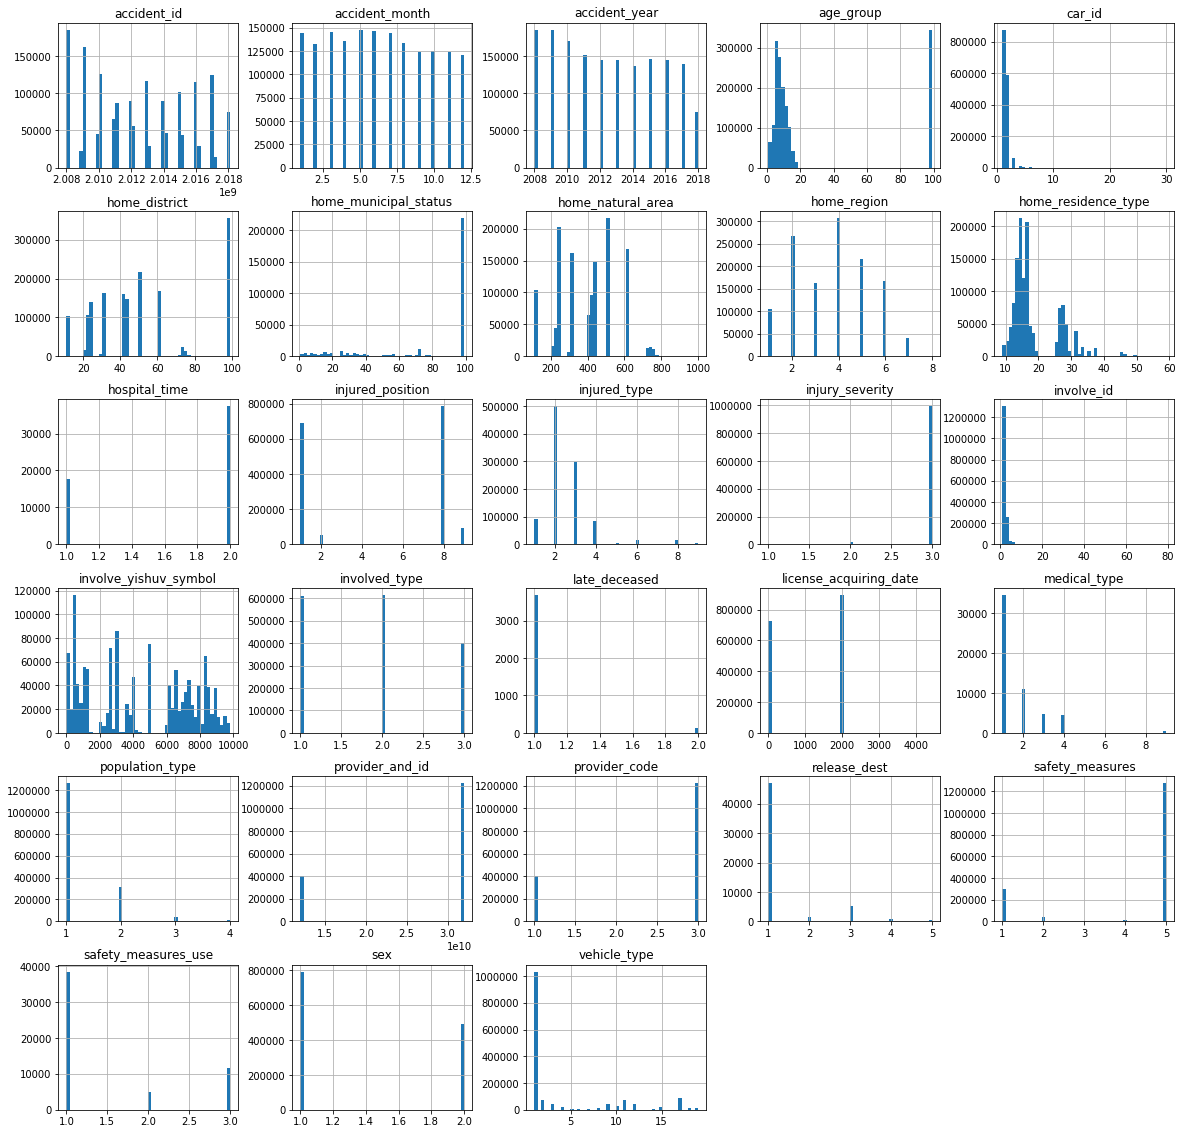

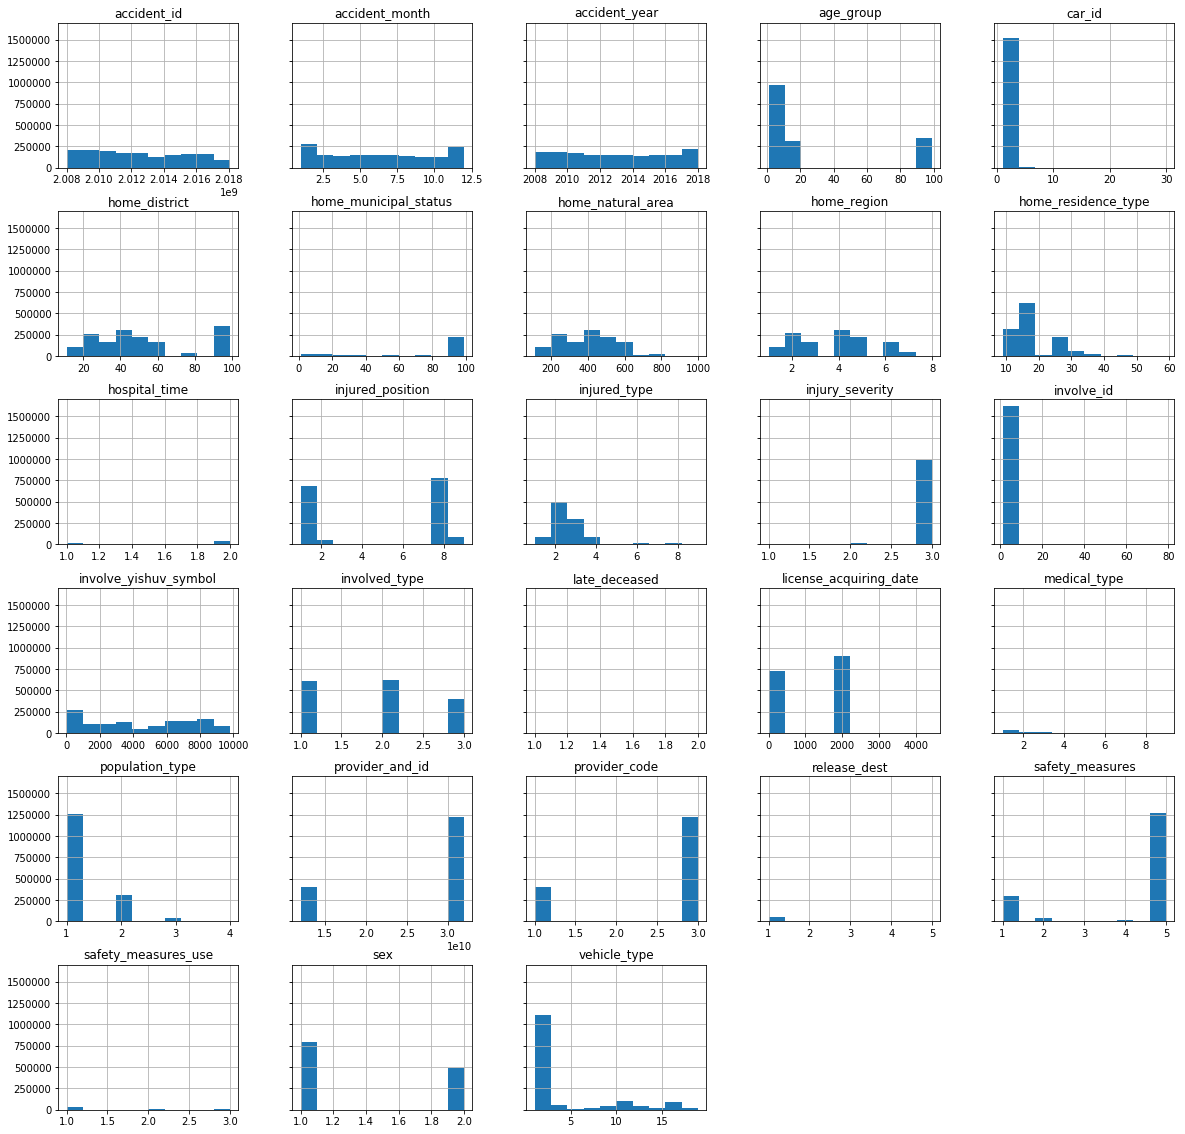

In [7]:
d.hist(figsize=[20, 20], sharey=False, bins=50)
d.hist(figsize=[20, 20], sharey=True)
print()

In [8]:
col_identity = {'ignore': ['accident_id','provider_and_id','provider_code'],
               'numeric' : ['license_acquiring_date', 'accident_year','accident_month'],
               'category' : ['age_group', 'sex', 'vehicle_type', 'safety_measures', 'population_type', 'home_region', 'home_district', 'home_natural_area', 'home_municipal_status', 'home_residence_type', 'medical_type', 'safety_measures_use', 'car_id', 'involve_id']}
col_target = 'late_deceased'

In [9]:
if not 'data' in globals():
    data_fname = 'data/involved_hebrew_dummies.parquet'
    if os.path.isfile(data_fname):
        data = pd.read_parquet(data_fname)
    else:
        rel_cols = col_identity['category'] + col_identity['numeric']
        data = d[col_identity['numeric']].fillna(-1)
        data['license_acquiring_date'] = data['license_acquiring_date'].replace(0, -1)
        dummies = pd.get_dummies(d[col_identity['category']], columns=col_identity['category'], prefix_sep='==')
        data = pd.concat([dummies, data], axis=1)
        data.to_parquet(data_fname)
data.head()

,age_group==1,age_group==2,age_group==3,age_group==4,age_group==5,age_group==6,age_group==7,age_group==8,age_group==9,age_group==10,...,involve_id==73,involve_id==74,involve_id==75,involve_id==76,involve_id==77,involve_id==78,involve_id==79,license_acquiring_date,accident_year,accident_month
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,-1,2009,4
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,-1,2010,4
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,-1,2010,11
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,-1,2015,6
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,-1,2015,10


In [10]:
y = d[col_target].fillna(0)
y[y == 2] = 1
y = y.astype(np.int16).values
x = data.fillna(-1).values

y.sum(), y.shape[0], x.shape

(3820, 1623850, (1623850, 359))

# balance the data and train forest of decision trees

In [11]:
from sklearn.model_selection import train_test_split
from imblearn.ensemble import BalancedRandomForestClassifier # !!!!!! balanced!
from sklearn.metrics import f1_score, precision_score, recall_score, balanced_accuracy_score
del df
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=42, test_size=0.25)

In [12]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
print("%.4f, %.4f"%(y_train.sum() / len(y_train), y_test.sum() / len(y_test)))

(1217887, 359) (405963, 359) (1217887,) (405963,)
0.0023, 0.0024


In [13]:
brf = BalancedRandomForestClassifier(n_estimators=30, random_state=0)
brf.fit(X_train, y_train)

BalancedRandomForestClassifier(bootstrap=True, class_weight=None,
                criterion='gini', max_depth=None, max_features='auto',
                max_leaf_nodes=None, min_impurity_decrease=0.0,
                min_samples_leaf=2, min_samples_split=2,
                min_weight_fraction_leaf=0.0, n_estimators=30, n_jobs=1,
                oob_score=False, random_state=0, replacement=False,
                sampling_strategy='auto', verbose=0, warm_start=False)

In [14]:
y_pred = brf.predict(X_test)

print('f1 score = %.3f'%(f1_score(y_test, y_pred, average='weighted')))
print('precision = %.3f'%(precision_score(y_test, y_pred, average='weighted')))
print('recall = %.3f'%(recall_score(y_test, y_pred, average='weighted')))
print('accuracy(balanced) = %.3f'%(balanced_accuracy_score(y_test, y_pred)))

f1 score = 0.902
precision = 0.997
recall = 0.825
accuracy(balanced) = 0.823


In [15]:
importance = pd.DataFrame(list(zip(data.columns, brf.feature_importances_)), columns=['feature', 'importance']).sort_values('importance', ascending=False)
importance[0:20].style.bar()

,feature,importance
242,release_dest==4.0,0.0799939
356,license_acquiring_date,0.0526832
21,vehicle_type==1.0,0.0521517
19,sex==1.0,0.0427569
237,medical_type==4.0,0.0420396
18,age_group==99,0.0385153
83,home_district==99,0.033475
244,safety_measures_use==1.0,0.0322114
45,population_type==1.0,0.0299905
247,car_id==1.0,0.0292874


In [16]:
if not os.path.isdir('models'): os.mkdir('models')
from sklearn.externals import joblib
joblib.dump(brf, 'models/2018_10_28_death_risk_balanced_RF_classifier_01.joblib')

['models/2018_10_28_death_risk_balanced_RF_classifier_01.joblib']

In [17]:
import lime
#eplain?

In [18]:
#see http://explained.ai/rf-importance/index.html

In [19]:
from sklearn.metrics import f1_score, precision_score, recall_score, balanced_accuracy_score

def metric(model, x, y):
    return balanced_accuracy_score(y, model.predict(x))

def permutation_importances(model, X_train, y_train):
    baseline = metric(model, X_train, y_train)
    imp = []
    for col in X_train.columns:
        save = X_train[col].copy()
        X_train[col] = np.random.permutation(X_train[col])
        m = metric(model, X_train, y_train)
        X_train[col] = save
        imp.append(baseline - m)
    return np.array(imp)

#permutation_importances(brf, data, y_train)


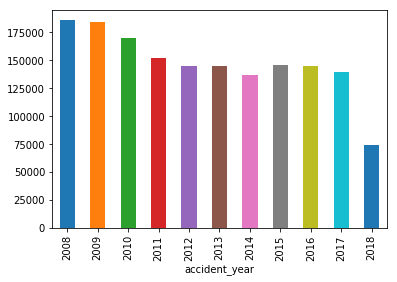

In [25]:
d.groupby('accident_year').count()['accident_id'].plot(kind='bar')